In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
sns.set()

2.0.0


In [2]:
# Fabricating dataset to see how well Feed Forward network learns the original function
# original function is y = cos(2x1)+cos(2x2)
n_obs = 10000
n_features = 2

# random seed
np.random.seed(42)

# uniformly generate feature space between -3 to +3
x = np.random.uniform(low=-3,high=3, size=(n_obs,n_features))

x1 = x[:,0]
x2 = x[:,1]
               
# generate target variable
y = np.cos(2*x1) + np.cos(2*x2)

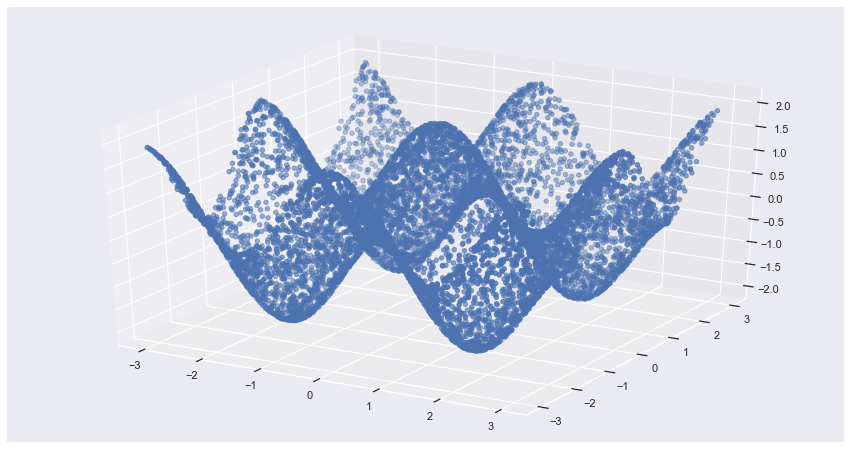

In [3]:
# visualize the dataset
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1,projection='3d')
ax.scatter(x1, x2, y,)

In [4]:
# Model building
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128,input_shape=(n_features,), activation='relu'))
model.add(tf.keras.layers.Dense(1))

# optimizer with custom parameters
opt = tf.keras.optimizers.Adam(0.01)

# compile the model
model.compile(optimizer=opt, loss='mse')

# train the model
hist = model.fit(x,y,epochs=100)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 124us/sample - loss: 0.6613
Epoch 2/100
10000/10000 [==============================] - 1s 72us/sample - loss: 0.0406
Epoch 3/100
10000/10000 [==============================] - 1s 75us/sample - loss: 0.0093
Epoch 4/100
10000/10000 [==============================] - 1s 76us/sample - loss: 0.0103
Epoch 5/100
10000/10000 [==============================] - 1s 77us/sample - loss: 0.0084
Epoch 6/100
10000/10000 [==============================] - 1s 73us/sample - loss: 0.0095
Epoch 7/100
10000/10000 [==============================] - 1s 70us/sample - loss: 0.0129
Epoch 8/100
10000/10000 [==============================] - 1s 76us/sample - loss: 0.0084
Epoch 9/100
10000/10000 [==============================] - 1s 77us/sample - loss: 0.0134
Epoch 10/100
10000/10000 [==============================] - 1s 77us/sample - loss: 0.0203
Epoch 11/100
10000/10000 [==============================] - 1s 75us/sample - loss: 0.

10000/10000 [==============================] - 1s 84us/sample - loss: 0.0060
Epoch 92/100
10000/10000 [==============================] - 1s 86us/sample - loss: 0.0071
Epoch 93/100
10000/10000 [==============================] - 1s 78us/sample - loss: 0.0059
Epoch 94/100
10000/10000 [==============================] - 1s 84us/sample - loss: 0.0057
Epoch 95/100
10000/10000 [==============================] - 1s 84us/sample - loss: 0.0065
Epoch 96/100
10000/10000 [==============================] - 1s 81us/sample - loss: 0.0072
Epoch 97/100
10000/10000 [==============================] - 1s 84us/sample - loss: 0.0051
Epoch 98/100
10000/10000 [==============================] - 1s 84us/sample - loss: 0.0049
Epoch 99/100
10000/10000 [==============================] - 1s 77us/sample - loss: 0.0040
Epoch 100/100
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0098


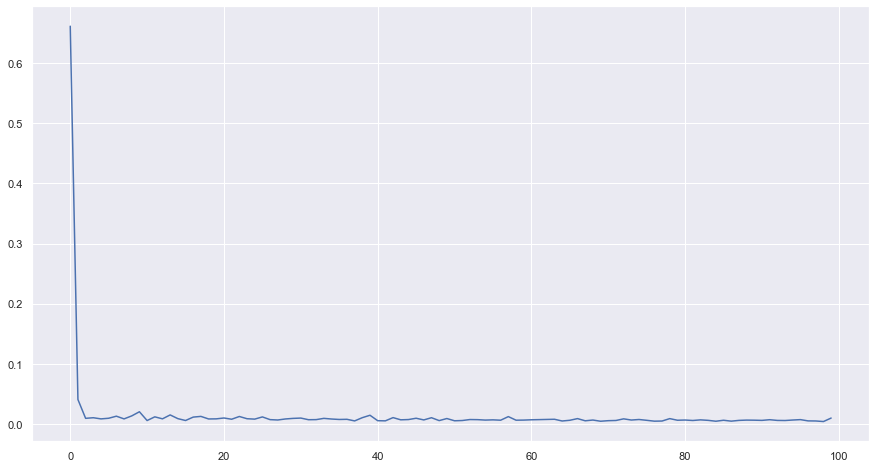

In [5]:
# plot loss 
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'], label='loss')

In [6]:
# prediction
predict = model.predict(x)

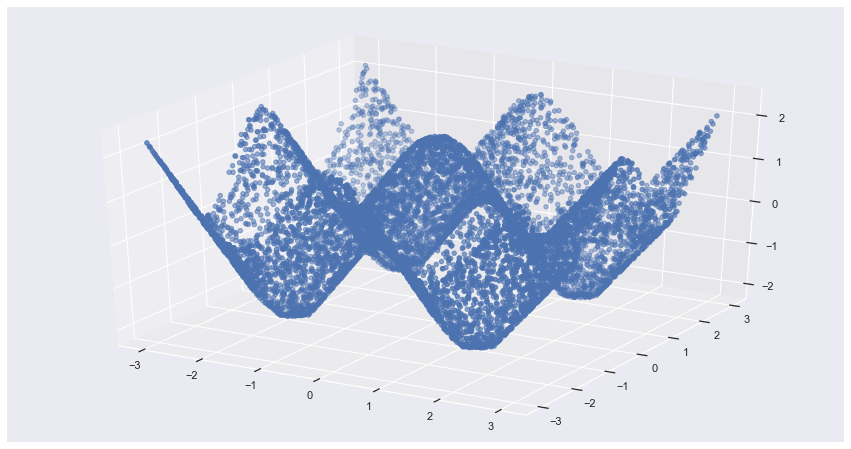

In [7]:
# plot the prediction
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1,projection='3d')
ax.scatter(x1, x2, predict,)

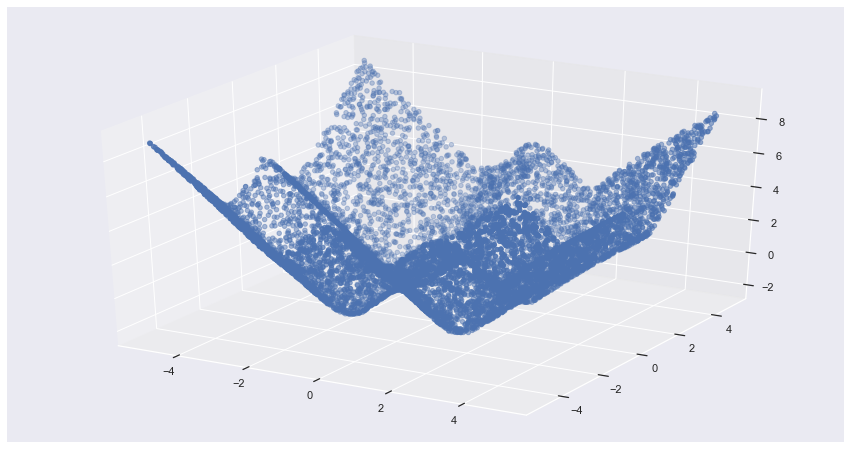

In [8]:
# model extrpolation

# uniformly generate feature space between -5 to +5
x = np.random.uniform(low=-5,high=5, size=(n_obs,n_features))

x1 = x[:,0]
x2 = x[:,1]

# prediction
predict = model.predict(x)

# plot prediction on extrapolated dataset
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1,projection='3d')
ax.scatter(x1, x2, predict,)

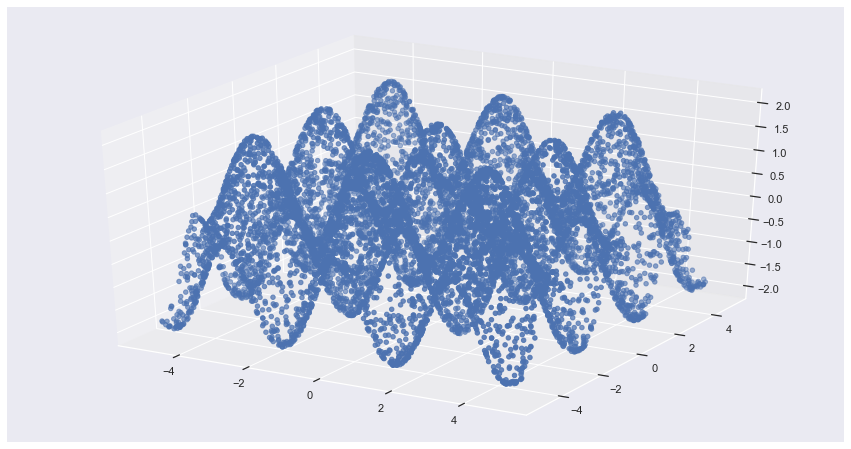

In [9]:
# plot actual

# generate target variable
y = np.cos(2*x1) + np.cos(2*x2)

# plot actual target on extrapolated dataset
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1,projection='3d')
ax.scatter(x1, x2, y,)